# Author: Amr Atef Elsayed
# Task 4: Exploratory Data Analysis Terrorism

# 1. Import main libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# 2. Explore Data

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv')
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

## select important columns

In [3]:
terrorism_df =  df[['iyear','imonth','iday','country_txt','city','attacktype1_txt','targtype1_txt','gname','nkill','nwound']]

## Rename columns 

In [4]:
terrorism_df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','attacktype1_txt':'attacktype','targtype1_txt':'target'},inplace=True)

In [5]:
terrorism_df.head()

,year,month,day,country,city,attacktype,target,gname,nkill,nwound
0,1970,7,2,Dominican Republic,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,1.0,0.0
1,1970,0,0,Mexico,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,0.0,0.0
2,1970,1,0,Philippines,Unknown,Assassination,Journalists & Media,Unknown,1.0,0.0
3,1970,1,0,Greece,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,NaN
4,1970,1,0,Japan,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,NaN


In [6]:
terrorism_df.shape

(181691, 10)

In [7]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        181691 non-null  int64  
 1   month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   country     181691 non-null  object 
 4   city        181257 non-null  object 
 5   attacktype  181691 non-null  object 
 6   target      181691 non-null  object 
 7   gname       181691 non-null  object 
 8   nkill       171378 non-null  float64
 9   nwound      165380 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 13.9+ MB


In [8]:
terrorism_df.describe()

,year,month,day,nkill,nwound
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [9]:
terrorism_df.isnull().sum()

year              0
month             0
day               0
country           0
city            434
attacktype        0
target            0
gname             0
nkill         10313
nwound        16311
dtype: int64

# 3- Data preprocessing

### 1- Fill null values

In [10]:
terrorism_df['nkill'].fillna(terrorism_df['nkill'].mean(),inplace=True)
terrorism_df['nwound'].fillna(terrorism_df['nwound'].mean(),inplace=True)

### 2-change data types of some columns

In [11]:
terrorism_df['year'] = terrorism_df['year'].astype('category')
terrorism_df['month'] = terrorism_df['month'].astype('category')
terrorism_df['day'] = terrorism_df['day'].astype('category')

In [12]:
terrorism_df['nkill'] = terrorism_df['nkill'].astype('int64')
terrorism_df['nwound'] = terrorism_df['nwound'].astype('int64')

In [13]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   year        181691 non-null  category
 1   month       181691 non-null  category
 2   day         181691 non-null  category
 3   country     181691 non-null  object  
 4   city        181257 non-null  object  
 5   attacktype  181691 non-null  object  
 6   target      181691 non-null  object  
 7   gname       181691 non-null  object  
 8   nkill       181691 non-null  int64   
 9   nwound      181691 non-null  int64   
dtypes: category(3), int64(2), object(5)
memory usage: 10.2+ MB


In [14]:
# no thing named israel, It's name is Palestine
terrorism_df.replace({'Israel':'Palestine'},inplace=True)

# 4- Data Analysis

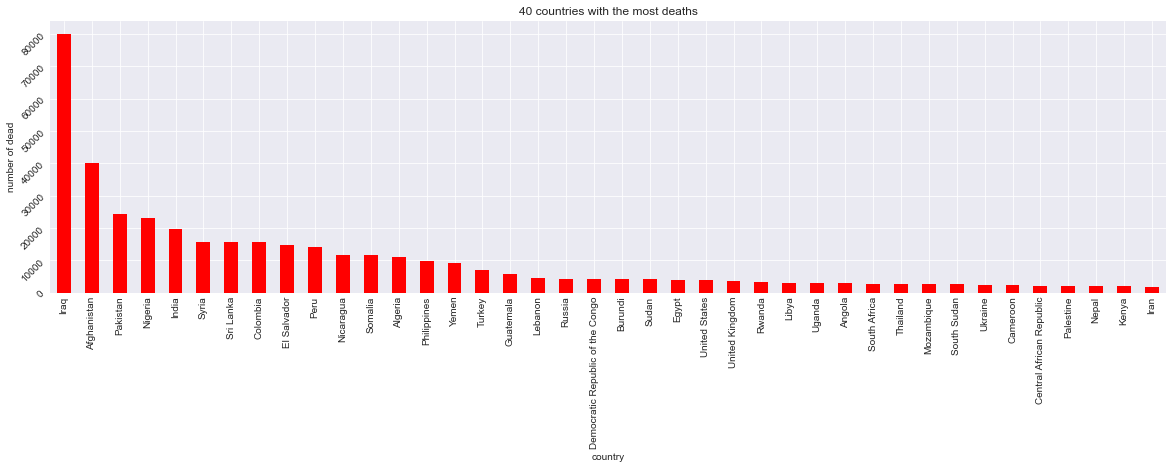

In [15]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-darkgrid')
plt.title("40 countries with the most deaths")
plt.xlabel('Country')
plt.ylabel('number of dead')
plt.yticks(rotation=45)
terrorism_df.groupby('country').sum()['nkill'].sort_values(ascending=False).head(40).plot(kind ='bar', color='r')
plt.show()

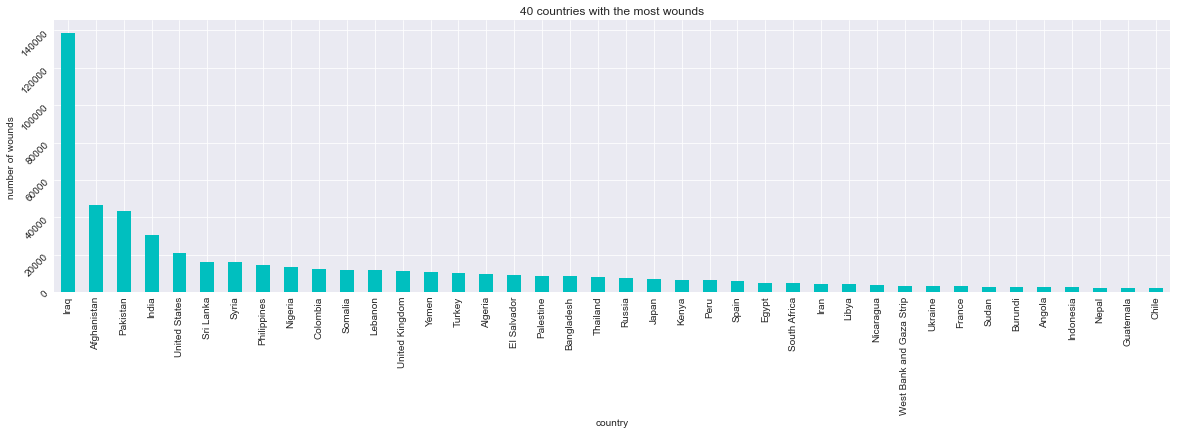

In [16]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-darkgrid')
plt.title("40 countries with the most wounds")
plt.xlabel('Country')
plt.ylabel('number of wounds')
plt.yticks(rotation=45)
terrorism_df.groupby('country').sum()['nwound'].sort_values(ascending=False).head(40).plot(kind ='bar', color='c')
plt.show()

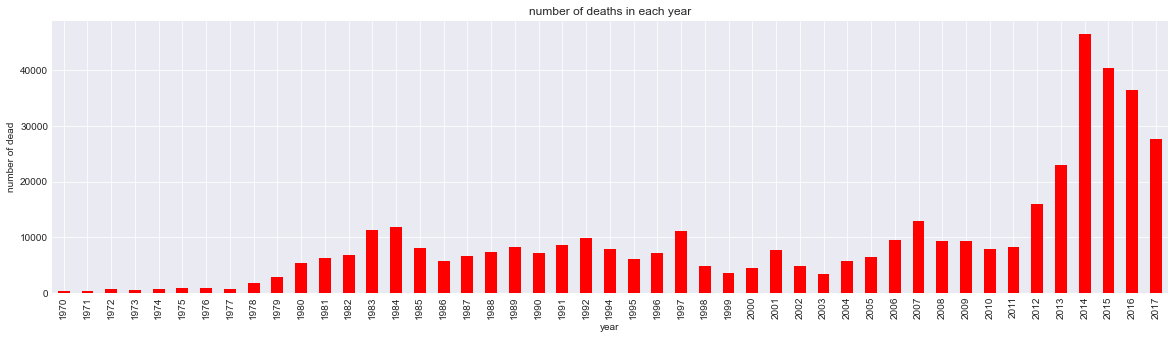

In [17]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-darkgrid')
plt.title("number of deaths in each year")
plt.xlabel('Country')
plt.ylabel('number of dead')
terrorism_df.groupby('year').sum()['nkill'].plot(kind='bar',color='r')
plt.show()

## The 40 countries that have had the most terrorism

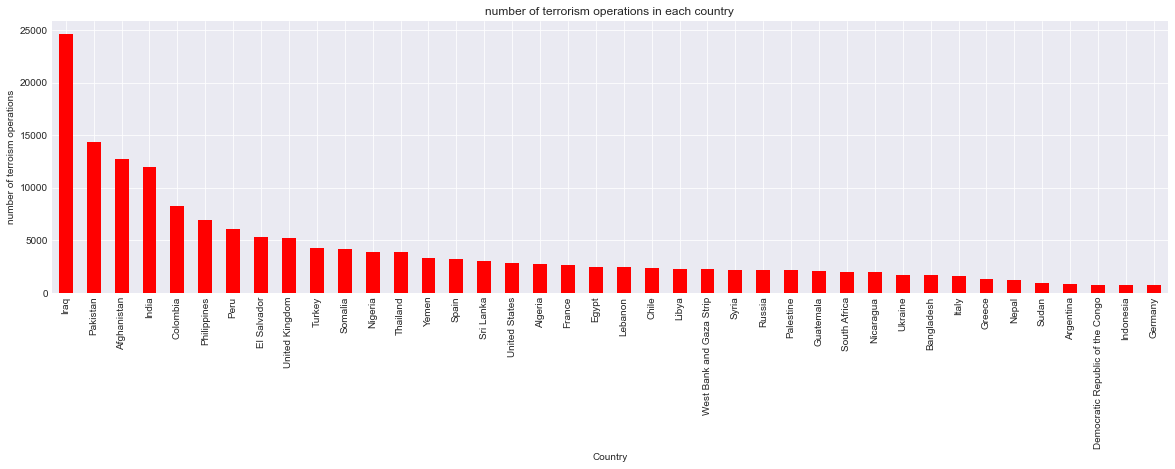

In [18]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-darkgrid')
plt.title("number of terrorism operations in each country")
plt.xlabel('Country')
plt.ylabel('number of terroism operations')
terrorism_df['country'].value_counts().head(40).plot(kind='bar',color='r')
plt.show()

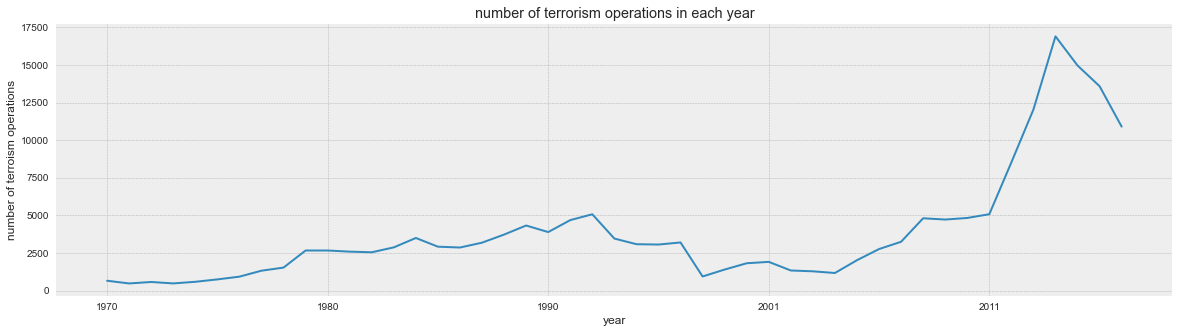

In [30]:
plt.figure(figsize=(20,5))
plt.style.use('bmh')
plt.title("number of terrorism operations in each year")
plt.xlabel('Year')
plt.ylabel('number of terroism operations')
terrorism_df.groupby('year').count()['country'].plot()
plt.show()

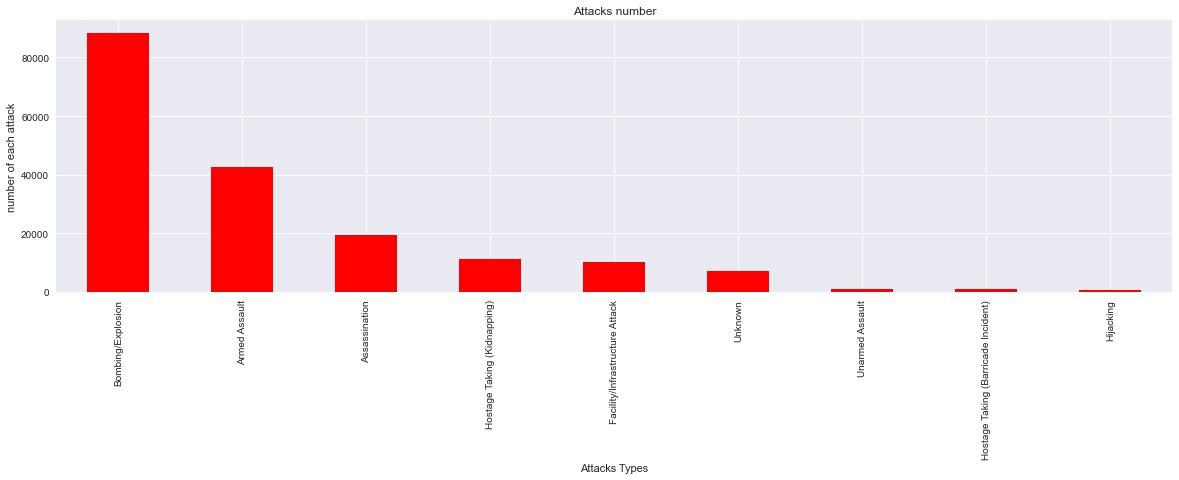

In [20]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn')
plt.title("Attacks number")
plt.xlabel('Attacks Types',)
plt.ylabel('number of each attack')
terrorism_df['attacktype'].value_counts().plot(kind='bar',color='r')
plt.show()

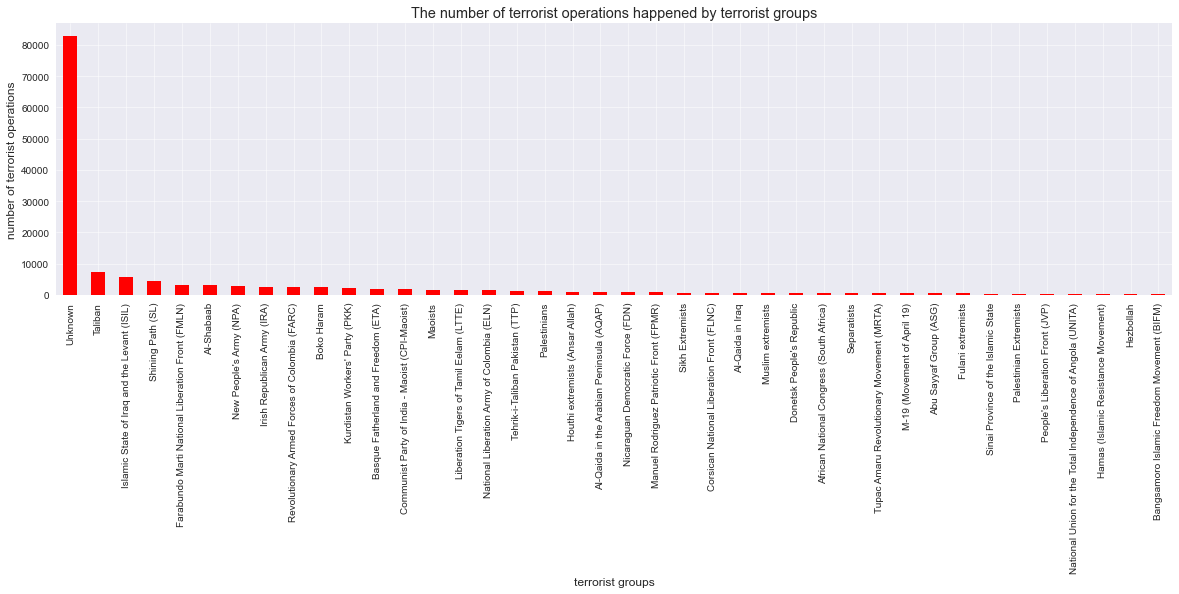

In [26]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-darkgrid')
plt.title("The number of terrorist operations happened by terrorist groups")
plt.xlabel('terrorist groups')
plt.ylabel('number of terrorist operations')
terrorism_df['gname'].value_counts().head(40).plot(kind='bar',color='r')
plt.show()

# Egypt country analysis

In [27]:
egypt_df = terrorism_df[terrorism_df['country']== 'Egypt']
egypt_df.head()

,year,month,day,country,city,attacktype,target,gname,nkill,nwound
133,1970,3,14,Egypt,Alexandria,Bombing/Explosion,Airports & Aircraft,Unknown,0,2
1092,1971,11,28,Egypt,Cairo,Assassination,Government (General),Black September,1,0
1181,1972,2,19,Egypt,Cairo,Hijacking,Airports & Aircraft,Jordanian National Liberation Movement,0,0
5603,1977,12,5,Egypt,Cairo,Assassination,Journalists & Media,Unknown,1,0
6797,1978,9,30,Egypt,Yamit,Bombing/Explosion,Private Citizens & Property,Palestinians,0,0


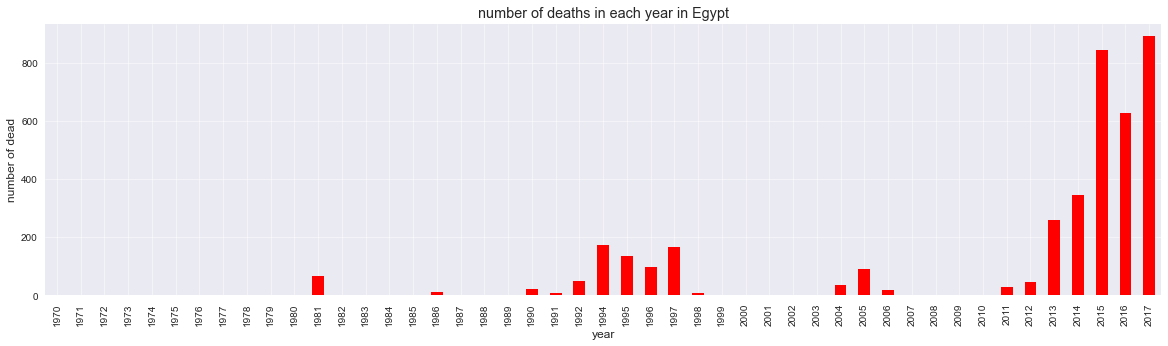

In [29]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-darkgrid')
plt.title("number of deaths in each year in Egypt")
plt.xlabel('Year')
plt.ylabel('number of dead')
egypt_df.groupby('year').sum()['nkill'].plot(kind='bar',color='r')
plt.show()

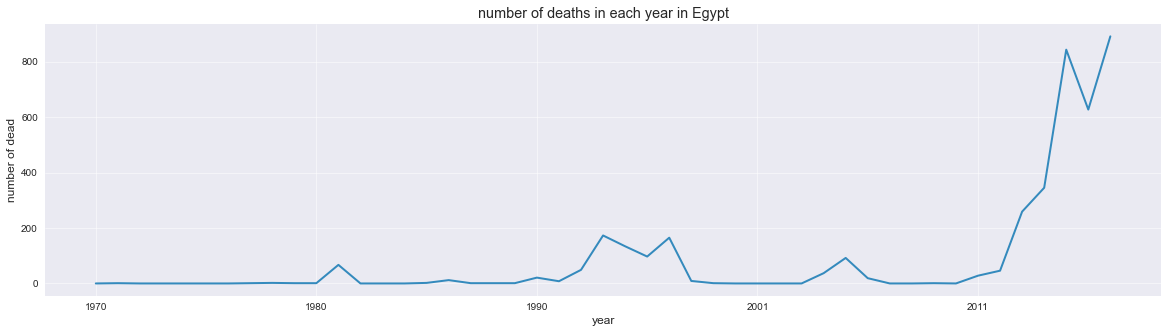

In [32]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-darkgrid')
plt.title("number of deaths in each year in Egypt")
plt.xlabel('Year')
plt.ylabel('number of dead')
egypt_df.groupby('year').sum()['nkill'].plot()
plt.show()

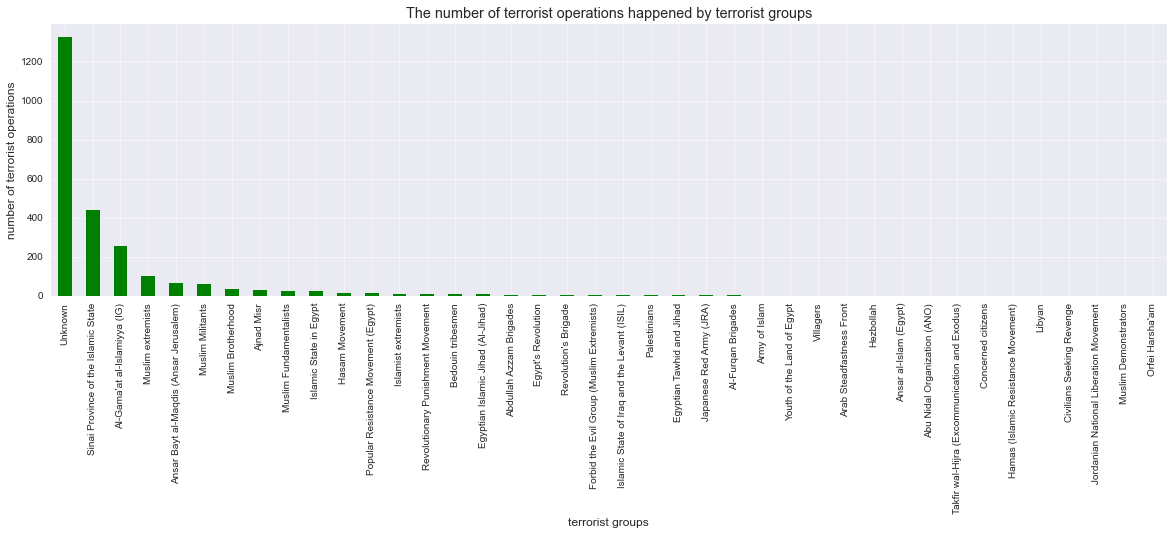

In [39]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-darkgrid')
plt.title("The number of terrorist operations happened by terrorist groups")
plt.xlabel('terrorist groups')
plt.ylabel('number of terrorist operations')
egypt_df['gname'].value_counts().head(40).plot(kind='bar',color='g')
plt.show()

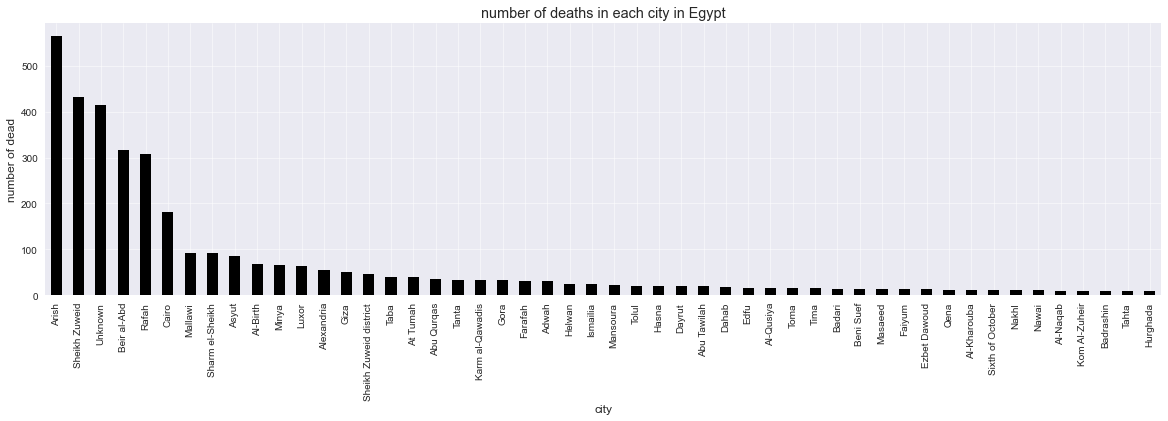

In [49]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-darkgrid')
plt.title("number of deaths in each city in Egypt")
plt.xlabel('Cities')
plt.ylabel('number of dead')
egypt_df.groupby('city').sum()['nkill'].sort_values(ascending=False).head(50).plot(kind='bar',color='black')
plt.show()

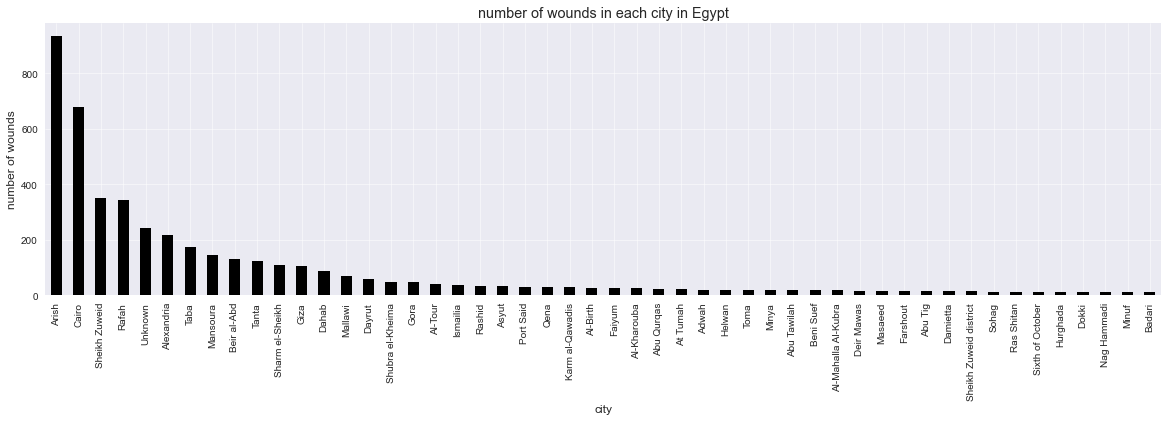

In [50]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-darkgrid')
plt.title("number of wounds in each city in Egypt")
plt.xlabel('Cities')
plt.ylabel('number of wounds')
egypt_df.groupby('city').sum()['nwound'].sort_values(ascending=False).head(50).plot(kind='bar',color='black')
plt.show()

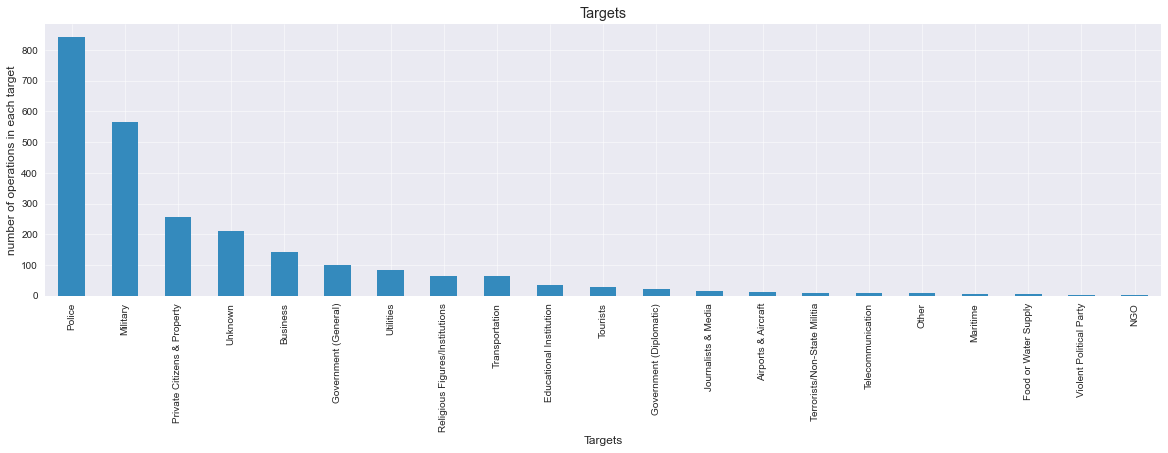

In [52]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-darkgrid')
plt.title("Targets")
plt.xlabel('Targets')
plt.ylabel('number of operations in each target')
egypt_df['target'].value_counts().plot(kind='bar')
plt.show()

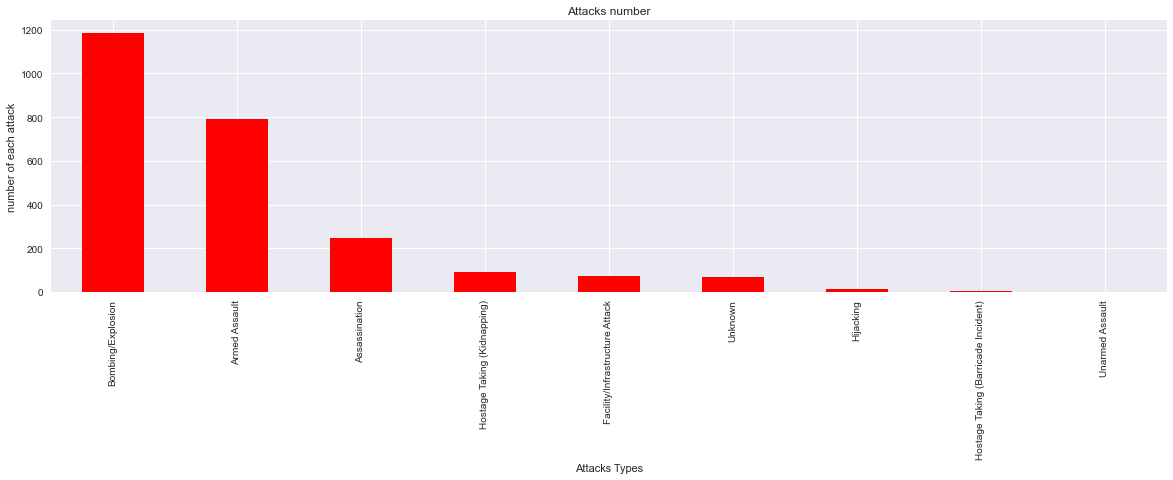

In [53]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn')
plt.title("Attacks number")
plt.xlabel('Attacks Types',)
plt.ylabel('number of each attack')
egypt_df['attacktype'].value_counts().plot(kind='bar',color='r')
plt.show()